In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("C:/Users/Abhyankar/Downloads/Health_Supplements.csv")

In [3]:
df.head()

,Unnamed: 0,Company,Product,Rating,Rating Counts,Price,Product Link,WebSite,Type of supplement,Num Quantity,Units Values,Category,Consumer,Flavour,Amount,Per Unit Price,Vegetarian
0,0,Six Star,Six Star 100% Creatine,4.5,11,22.99,https://walgreens.com/store/c/six-star-100-cre...,Walgreens,Creatine,10.58,NaN,general,general,general,NaN,2.17,general
1,1,Six Star,"Six Star Creatine X3, Powder",4.5,72,29.99,https://walgreens.com/store/c/six-star-creatin...,Walgreens,Creatine,2.18,NaN,general,general,general,NaN,0.86,general
2,2,Walgreens,Walgreens Whey Protein Powder with Creatine & ...,5.0,2,5.00,https://walgreens.com/store/c/walgreens-whey-p...,Walgreens,Creatine,1.4,NaN,general,general,chocolate,NaN,5,general
3,3,Walgreens,Walgreens Women's Multivitamin Gummies Natural...,4.0,58,13.99,https://walgreens.com/store/c/walgreens-women'...,Walgreens,Multivitamins,150,Tablets,whole_food_multivitamins,general,berry,150,0.09,general
4,4,Walgreens,Walgreens Adult Multivitamin Tablets,4.5,49,14.99,https://walgreens.com/store/c/walgreens-adult-...,Walgreens,Multivitamins,200,Tablets,age_specific_multivitamins,general,general,200,0.07,general


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18668 entries, 0 to 18667
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          18668 non-null  int64  
 1   Company             18668 non-null  object 
 2   Product             18668 non-null  object 
 3   Rating              18668 non-null  float64
 4   Rating Counts       18668 non-null  int64  
 5   Price               18668 non-null  float64
 6   Product Link        18668 non-null  object 
 7   WebSite             18668 non-null  object 
 8   Type of supplement  18668 non-null  object 
 9   Num Quantity        18629 non-null  object 
 10  Units Values        18659 non-null  object 
 11  Category            18355 non-null  object 
 12  Consumer            18668 non-null  object 
 13  Flavour             18668 non-null  object 
 14  Amount              18659 non-null  object 
 15  Per Unit Price      18668 non-null  object 
 16  Vege

In [5]:
df.isnull().sum()

Unnamed: 0              0
Company                 0
Product                 0
Rating                  0
Rating Counts           0
Price                   0
Product Link            0
WebSite                 0
Type of supplement      0
Num Quantity           39
Units Values            9
Category              313
Consumer                0
Flavour                 0
Amount                  9
Per Unit Price          0
Vegetarian              0
dtype: int64

In [6]:
df['Category'] = df['Category'].fillna('general')

In [7]:
df.isnull().sum()

Unnamed: 0             0
Company                0
Product                0
Rating                 0
Rating Counts          0
Price                  0
Product Link           0
WebSite                0
Type of supplement     0
Num Quantity          39
Units Values           9
Category               0
Consumer               0
Flavour                0
Amount                 9
Per Unit Price         0
Vegetarian             0
dtype: int64

In [8]:
clust_df = df[df['Type of supplement'] == 'Multivitamins']

In [9]:
clust_df.head()

,Unnamed: 0,Company,Product,Rating,Rating Counts,Price,Product Link,WebSite,Type of supplement,Num Quantity,Units Values,Category,Consumer,Flavour,Amount,Per Unit Price,Vegetarian
3,3,Walgreens,Walgreens Women's Multivitamin Gummies Natural...,4.0,58,13.99,https://walgreens.com/store/c/walgreens-women'...,Walgreens,Multivitamins,150,Tablets,whole_food_multivitamins,general,berry,150,0.09,general
4,4,Walgreens,Walgreens Adult Multivitamin Tablets,4.5,49,14.99,https://walgreens.com/store/c/walgreens-adult-...,Walgreens,Multivitamins,200,Tablets,age_specific_multivitamins,general,general,200,0.07,general
5,5,Walgreens,"Walgreens Men 50+ Multivitamin Tablets, Gluten...",4.5,84,15.99,https://walgreens.com/store/c/walgreens-men-50...,Walgreens,Multivitamins,200,Tablets,general,Men,general,200,0.08,general
6,6,Nature Made,Nature Made Multivitamin For Her Tablets,4.6,143,13.99,https://walgreens.com/store/c/nature-made-mult...,Walgreens,Multivitamins,90,Tablets,general,general,general,90,0.16,general
7,7,Nature Made,Nature Made Multivitamin For Her Tablets,4.5,143,13.99,https://walgreens.com/store/c/nature-made-mult...,Walgreens,Multivitamins,90,Tablets,general,general,general,90,0.16,general


In [10]:
req = ['Company', 'WebSite', 'Price', 'Rating']

clust = clust_df[req]

In [11]:
clust.head()

,Company,WebSite,Price,Rating
3,Walgreens,Walgreens,13.99,4.0
4,Walgreens,Walgreens,14.99,4.5
5,Walgreens,Walgreens,15.99,4.5
6,Nature Made,Walgreens,13.99,4.6
7,Nature Made,Walgreens,13.99,4.5


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clust['Company'] = le.fit_transform(clust['Company'])
clust['WebSite'] = le.fit_transform(clust['WebSite'])

C:\Users\Abhyankar\AppData\Local\Temp\ipykernel_264\1310590110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['Company'] = le.fit_transform(clust['Company'])
C:\Users\Abhyankar\AppData\Local\Temp\ipykernel_264\1310590110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['WebSite'] = le.fit_transform(clust['WebSite'])


In [13]:
clust.head()

,Company,WebSite,Price,Rating
3,191,0,13.99,4.0
4,191,0,14.99,4.5
5,191,0,15.99,4.5
6,110,0,13.99,4.6
7,110,0,13.99,4.5


In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
scaler = StandardScaler()

clust_f = scaler.fit_transform(clust)

In [16]:
clust_f.shape

(4081, 4)

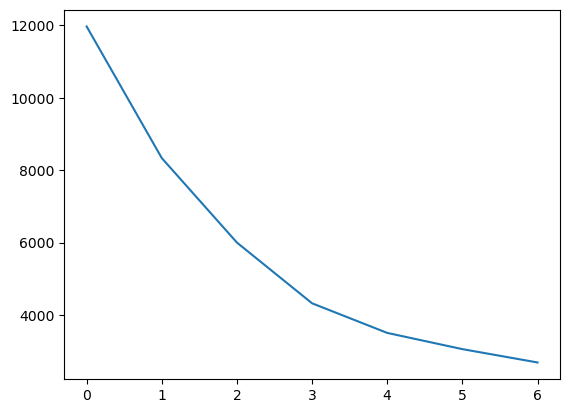

In [17]:
#Elbow Method
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(clust_f)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [18]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(clust_f)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(clust_f, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4339832969433178
For n_clusters=3, the silhouette score is 0.44078560809044093
For n_clusters=4, the silhouette score is 0.4079808117803511
For n_clusters=5, the silhouette score is 0.4149913053876908
For n_clusters=6, the silhouette score is 0.4351562730772865
For n_clusters=7, the silhouette score is 0.4088896985341433
For n_clusters=8, the silhouette score is 0.391712266578016


In [19]:
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(clust_f)


KMeans(n_clusters=4)

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [21]:
clust['Cluster_Id'] = kmeans.labels_
clust.head()

C:\Users\Abhyankar\AppData\Local\Temp\ipykernel_264\1598933165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust['Cluster_Id'] = kmeans.labels_


,Company,WebSite,Price,Rating,Cluster_Id
3,191,0,13.99,4.0,0
4,191,0,14.99,4.5,0
5,191,0,15.99,4.5,0
6,110,0,13.99,4.6,0
7,110,0,13.99,4.5,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Price'>

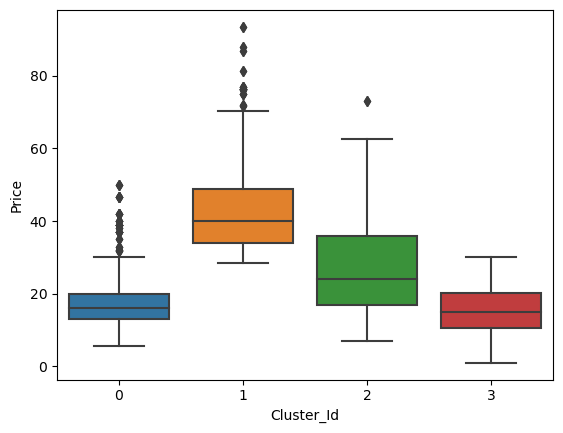

In [22]:
sns.boxplot(x='Cluster_Id', y='Price', data=clust)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Rating'>

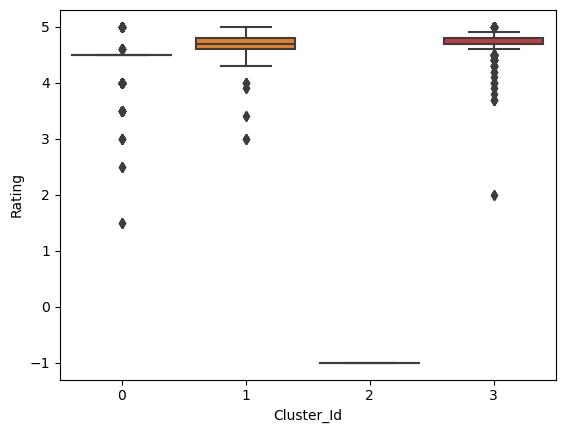

In [23]:
sns.boxplot(x='Cluster_Id', y='Rating', data=clust)

In [24]:
clust.to_csv("Cluster.csv")

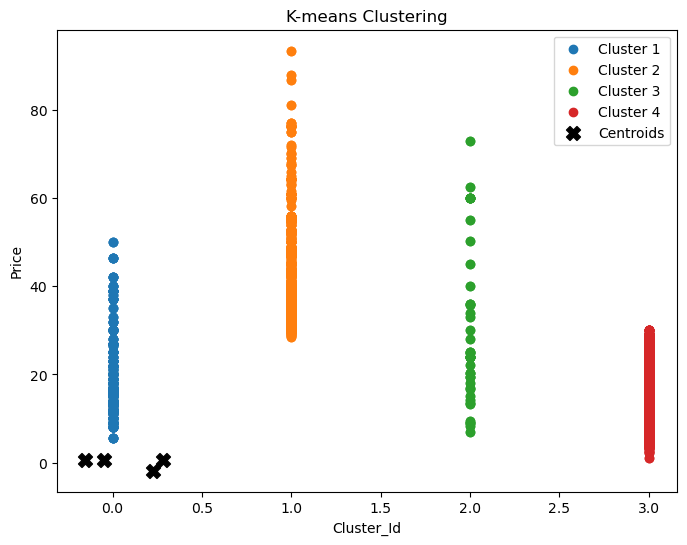

In [25]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))

# Extract the feature columns for visualization
feature_cols = ['Cluster_Id', 'Price']  # Replace 'Feature1' and 'Feature2' with the actual column names in your 'clust' DataFrame

# Loop through each cluster and plot the data points belonging to that cluster with a different color
for cluster_id in range(k):
    cluster_data = clust[clust['Cluster_Id'] == cluster_id]
    plt.scatter(cluster_data[feature_cols[0]], cluster_data[feature_cols[1]], label=f'Cluster {cluster_id + 1}')

# Plot the centroids of each cluster as well
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

# Set plot labels and title
plt.xlabel('Cluster_Id')
plt.ylabel('Price')
plt.title('K-means Clustering')

# Show the legend
plt.legend()

# Show the plot
plt.show()

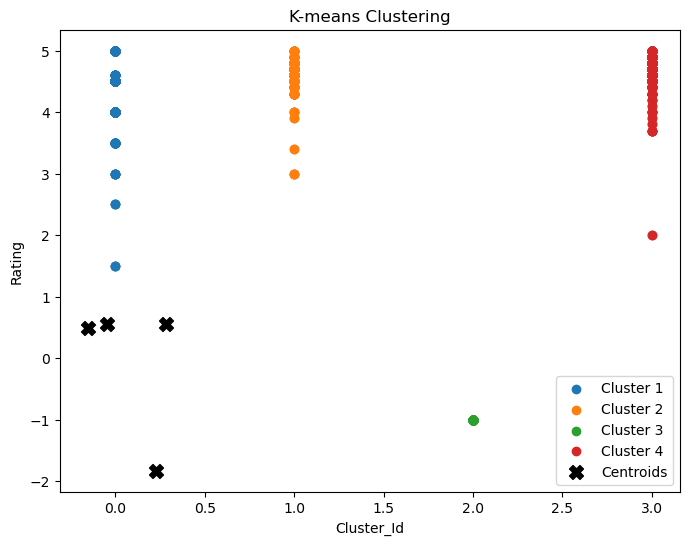

In [26]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))

# Extract the feature columns for visualization
feature_cols = ['Cluster_Id', 'Rating']  # Replace 'Feature1' and 'Feature2' with the actual column names in your 'clust' DataFrame

# Loop through each cluster and plot the data points belonging to that cluster with a different color
for cluster_id in range(k):
    cluster_data = clust[clust['Cluster_Id'] == cluster_id]
    plt.scatter(cluster_data[feature_cols[0]], cluster_data[feature_cols[1]], label=f'Cluster {cluster_id + 1}')

# Plot the centroids of each cluster as well
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

# Set plot labels and title
plt.xlabel('Cluster_Id')
plt.ylabel('Rating')
plt.title('K-means Clustering')

# Show the legend
plt.legend()

# Show the plot
plt.show()